In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import scienceplots
import torch
plt.style.use(['science'])

In [10]:
NBP_PATH = 'surface_17_weights/circuit_He=s.csv'
BP_PATH = 'data/bp_bposd_nbp_comparison.csv'
WEIGHTS_PATH = 'surface_17_weights/circuit_He=s'

In [79]:
weights_de = torch.load(f'{WEIGHTS_PATH}/weights_de.pt')
marg_weights_de = torch.load(f'{WEIGHTS_PATH}/marg_weights_de.pt')
weights_llr = torch.load(f'{WEIGHTS_PATH}/weights_llr.pt')
marg_weights_llr = torch.load(f'{WEIGHTS_PATH}/marg_weights_llr.pt')
residual_weights = torch.load(f'{WEIGHTS_PATH}/residual_weights.pt')
rhos = torch.load(f'{WEIGHTS_PATH}/rhos.pt')

In [14]:
nbp_data = pd.read_csv(NBP_PATH)
bp_data = pd.read_csv(BP_PATH)

In [15]:
nbp_data

,error_rate,shots,fails,dec_time_per_shot
0,0.001,1000,1,0.006864
1,0.002,1000,8,0.010631
2,0.003,1000,6,0.014889
3,0.004,1000,20,0.017636
4,0.005,1000,25,0.018834
5,0.006,1000,49,0.021699
6,0.007,1000,60,0.022269
7,0.008,1000,83,0.023130
8,0.009,1000,88,0.023790
9,0.010,1000,90,0.024686


In [16]:
bp_data

,code,distance,rounds,noise_model,error_rate,decoder,shots,fails,dec_time_per_shot
0,surface,3,3,cl,0.010,bp,1000,135,0.000601
1,surface,3,3,cl,0.009,bp,1000,118,0.000488
2,surface,3,3,cl,0.008,bp,1000,87,0.000428
3,surface,3,3,cl,0.004,bp,1000,21,0.000213
4,surface,3,3,cl,0.006,bp,1000,56,0.000316
5,surface,3,3,cl,0.002,bp,1000,10,0.000114
6,surface,3,3,cl,0.007,bp,1000,71,0.000402
7,surface,3,3,cl,0.005,bp,1000,37,0.000273
8,surface,3,3,cl,0.001,bp,1000,2,0.000061
9,surface,3,3,cl,0.003,bp,1000,16,0.000168


In [58]:
ps = np.arange(0.001, 0.011, 0.001)
df_bp = bp_data[bp_data['decoder']=='bp']
df_bposd = bp_data[bp_data['decoder']=='bposd']

bp_ler = []
bposd_ler = []
nbp_ler = []

for p in ps:
    p = round(p, 3)
    bp_ler.append(df_bp[df_bp['error_rate'] == p]['fails'].values[0])
    bposd_ler.append(df_bposd[df_bposd['error_rate'] == p]['fails'].values[0])
    nbp_ler.append(nbp_data[nbp_data['error_rate'] == p]['fails'].values[0])
    
bp_ler = np.array(bp_ler)
bposd_ler = np.array(bposd_ler)
nbp_ler = np.array(nbp_ler)

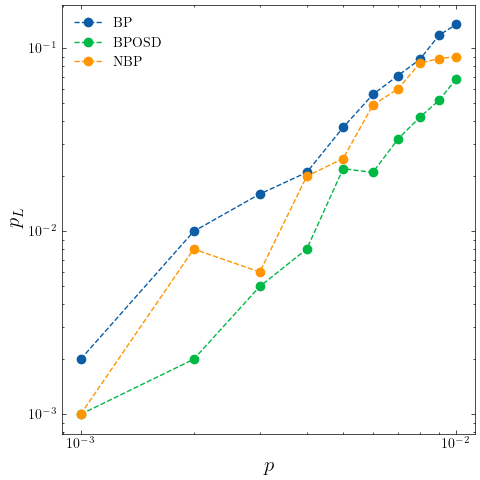

In [71]:
plt.figure(figsize=(5, 5))
plt.loglog(ps, bp_ler/1000, label='BP', linestyle='--', marker='o')
plt.loglog(ps, bposd_ler/1000, label='BPOSD', linestyle='--', marker='o')
plt.loglog(ps, nbp_ler/1000, label='NBP', linestyle='--', marker='o')
plt.xlabel(r'$p$', fontsize=15)
plt.ylabel(r'$p_L$', fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()

### NBP Weights

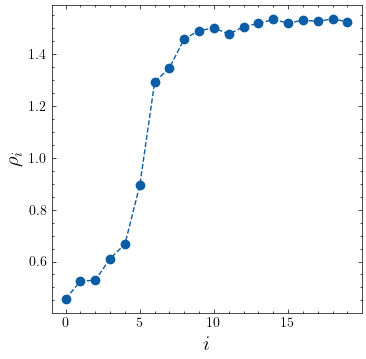

In [72]:
plt.figure(figsize=(4, 4))
plt.plot(rhos[0].detach().numpy(), linestyle='--', marker='o')
plt.xlabel(r'$i$', fontsize=15)
plt.ylabel(r'$\rho_i$', fontsize=15)
plt.show()

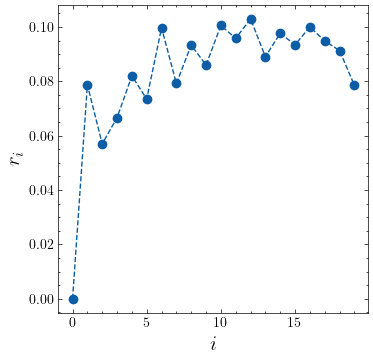

In [73]:
plt.figure(figsize=(4, 4))
plt.plot(residual_weights[0].detach().numpy(), linestyle='--', marker='o')
plt.xlabel(r'$i$', fontsize=15)
plt.ylabel(r'$r_i$', fontsize=15)
plt.show()

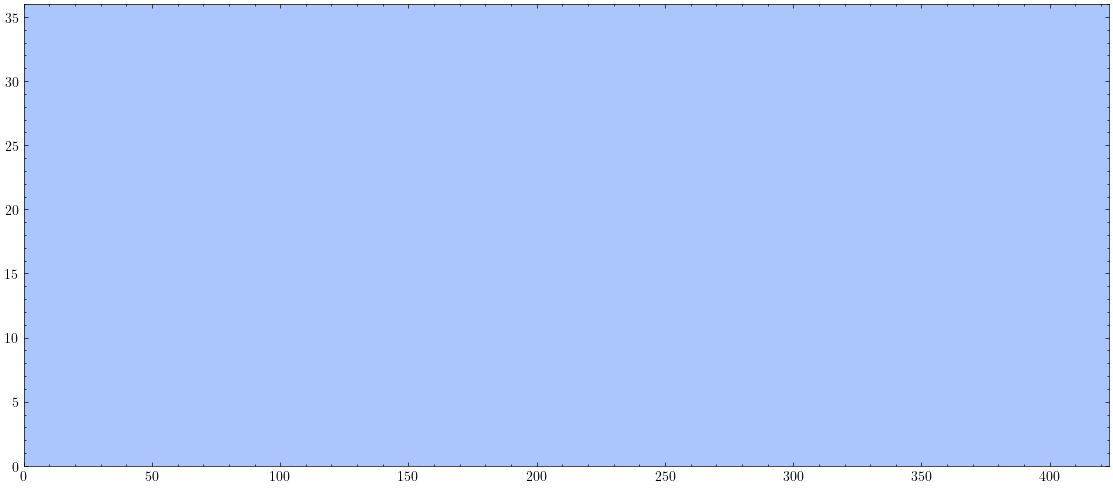

<Figure size 350x262.5 with 0 Axes>

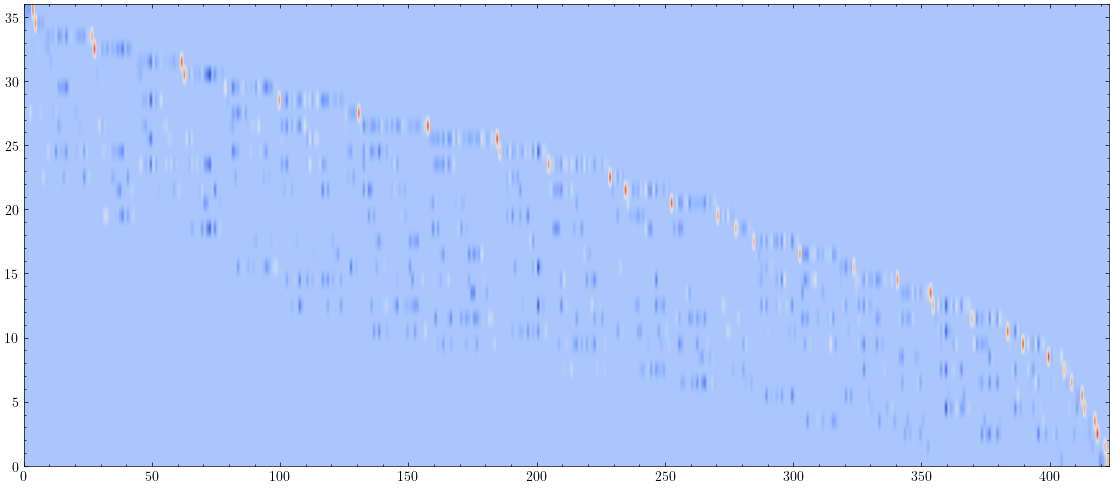

<Figure size 350x262.5 with 0 Axes>

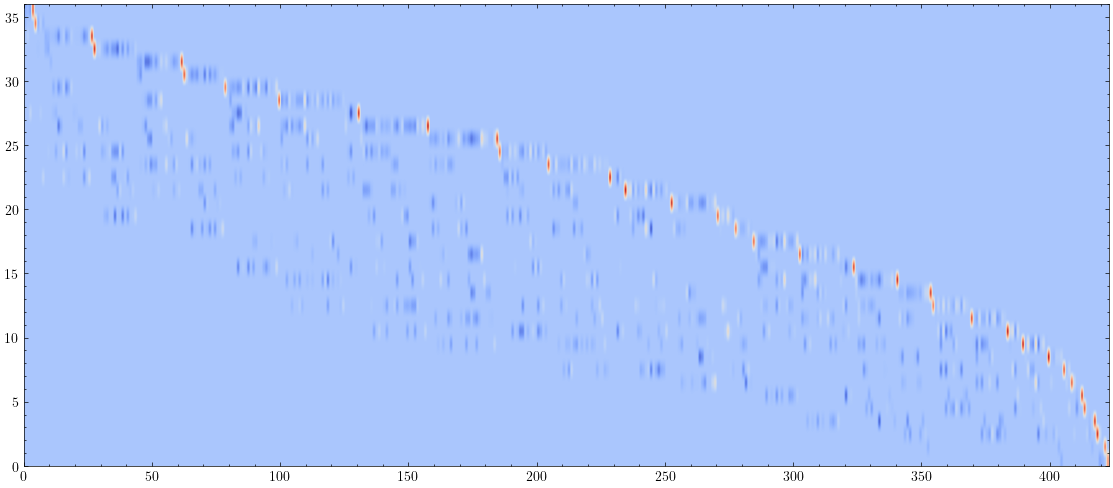

<Figure size 350x262.5 with 0 Axes>

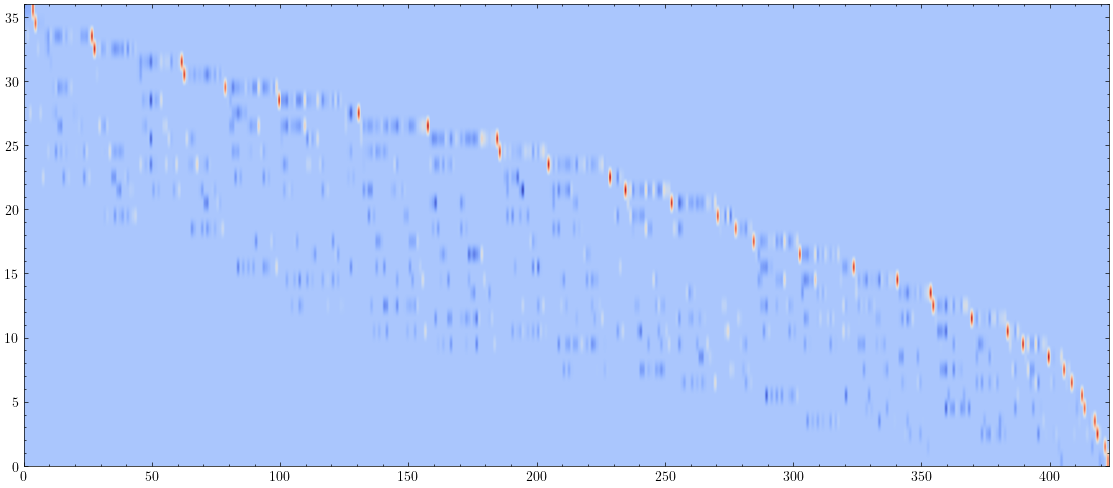

<Figure size 350x262.5 with 0 Axes>

In [102]:
iterations = np.arange(0, 20, 5)
for i in iterations:
    plt.figure(figsize=(14, 14))
    plt.imshow(weights_de[i].detach().numpy(), cmap='coolwarm', vmin=0.9, vmax=1.2, extent=[0,len(weights_de[i][0]),0,len(weights_de[i])], aspect=5)
    # plt.colorbar()
    plt.show()
    plt.clf()